#### K-MEANS CLUSTERING


In [11]:
#### KMEANS SKLEARN
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
print("Fitted data result",kmeans.labels_)

res=kmeans.predict([[0, 0], [12, 3]])
print("Predicted data result",res)
print("kmeans.cluster_centers_:",kmeans.cluster_centers_)


Fitted data result [1 1 1 0 0 0]
Predicted data result [1 0]
kmeans.cluster_centers_: [[10.  2.]
 [ 1.  2.]]


In [23]:
#### KMEANS++ SKLEARN
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++').fit(X)
print("Fitted data result",kmeans.labels_)

res=kmeans.predict([[0, 0], [12, 3]]) ###unknown points
print("Predicted data result",res)
print("kmeans.cluster_centers_:",kmeans.cluster_centers_)

"""NOTE: Kmeans++ has a upper hand over regular kmeans as it converge fastly"""

Fitted data result [1 1 1 0 0 0]
Predicted data result [1 0]
kmeans.cluster_centers_: [[10.  2.]
 [ 1.  2.]]


'NOTE: Kmeans++ has a upper hand over regular kmeans as it convergence fastly'

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Though the following import is not directly being used, it is required
# for 3D projection to work with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

###Random K value k=2
kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++').fit(X)
print("Fitted data result",kmeans.labels_)

##Kvalue based on ground truth
kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++').fit(X)
print("Fitted data result",kmeans.labels_)

Fitted data result [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
Fitted data result [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


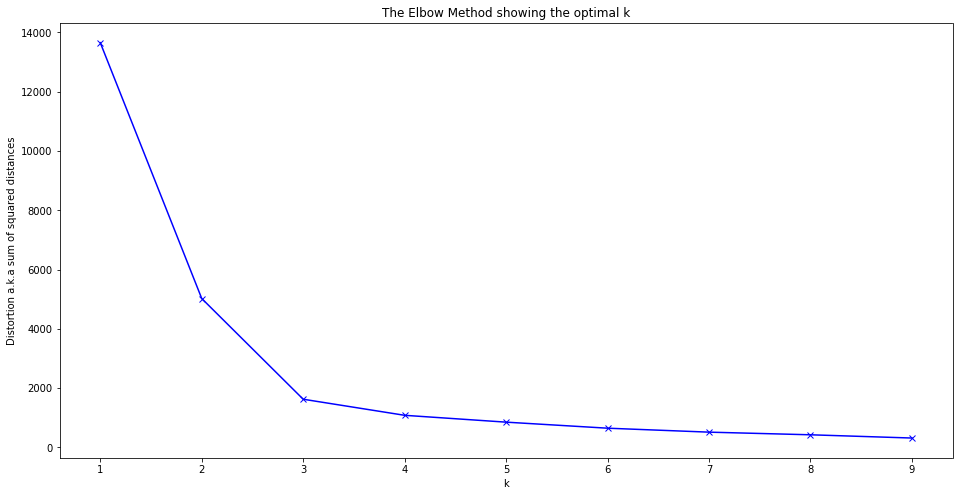

'From graph it is clear that k=3 is the elbow bend'

In [27]:
###Elbow method to determine the cluster
##Distortion:we are calculating the sum of squared distances from each point to its assigned center
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion a.k.a sum of squared distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

"""From graph it is clear that k=3 is the elbow bend"""

In [12]:
####KMEANS from SCRATCH

Step 1. Randomly pick k data points as our initial Centroids.

Step 2. Find the distance (Euclidean distance for our purpose) between each data points in our training set with the k centroids.

Step 3. Now assign each data point to the closest centroid according to the distance found.

Step 4. Update centroid location by taking the average of the points in each cluster group.

Step 5. Repeat the Steps 2 to 4 till our centroids don’t change.

We can choose optimal value of K (Number of Clusters) using methods like the The Elbow method.


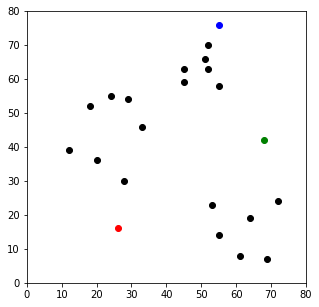

    x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0  12  39        26.925824        56.080300        56.727418        1     r
1  20  36        20.880613        48.373546        53.150729        1     r
2  28  30        14.142136        41.761226        53.338541        1     r
3  18  52        36.878178        50.990195        44.102154        1     r
4  29  54        38.118237        40.804412        34.058773        3     b


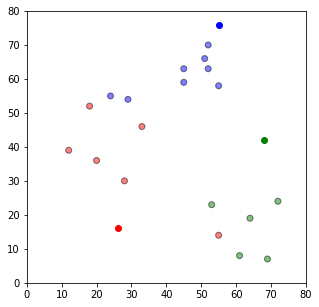

In [13]:
## 1. Initialisation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})


np.random.seed(200)
k = 3
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(k)
}
    
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

## 2. Assignment Stage and 3. distance calculation

def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 + (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

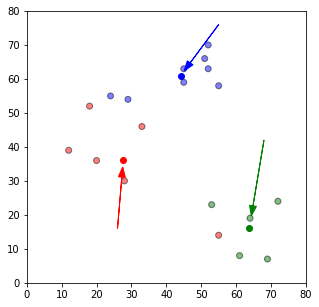

In [14]:
### 4. Updation
import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

centroids = update(centroids)
    
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()

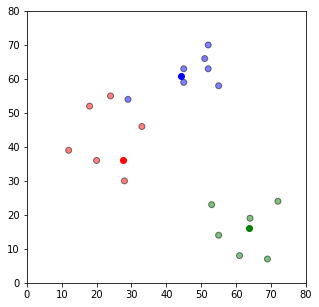

In [15]:
## 5. Repeat Assigment Stage

df = assignment(df, centroids)

# Plot results
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

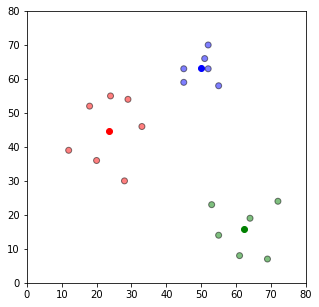

In [16]:
#5. Continue until all assigned categories don't change any more
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [21]:
## TESTING: We will now repeat the above using scikit-learn, we first fit to our data

df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='k-means++')
print(kmeans.fit(df))

labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_
print("labels", labels, "\n", "centroids", centroids)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
labels [2 2 2 2 2 2 2 0 0 0 0 0 0 1 1 1 1 1 1] 
 centroids [[50.         63.16666667]
 [62.33333333 15.83333333]
 [23.42857143 44.57142857]]


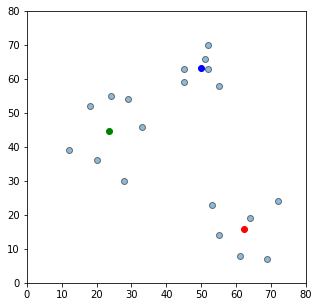

In [18]:
###Display Result
fig = plt.figure(figsize=(5, 5))

colors = map(lambda x: colmap[x+1], labels)

plt.scatter(df['x'], df['y'], alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

### CLUSTERING DIGIT DATASET

In [19]:
#Importing required modules
 
import numpy as np
from scipy.spatial.distance import cdist 
 
#Function to implement steps given in previous section
def kmeans(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[idx, :] #Step 1
     
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean') #Step 2
     
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
     
    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
    return points 
##The above function return an array of cluster labels for each data point in our training set.


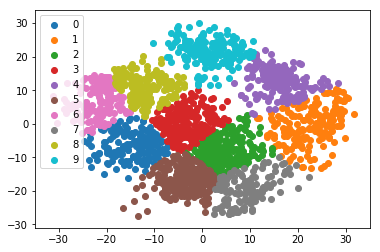

In [20]:
#Testing the K-Means Clusters
"""We will use the digits dataset (inbuilt within the sklearn module) for testing our function. You can refer to this article to know more about plotting K-Means Clusters."""

#Loading the required modules
 
import numpy as np
from scipy.spatial.distance import cdist 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
 
#Defining our function 
def kmeans(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[idx, :] #Step 1
     
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean') #Step 2
     
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
     
    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
    return points 
 
 
#Load Data
data = load_digits().data
pca = PCA(2)
  
#Transform the data
df = pca.fit_transform(data)
 
#Applying our function
label = kmeans(df,10,1000)
 
#Visualize the results
 
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

#The output results look promising. Our Implementation Works.